<a href="https://colab.research.google.com/github/PreetiKumari2208/projects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
import pandas as pd
import numpy as np

# Load training data
df_train_input = pd.read_csv('input.csv', delimiter=',', header=None,skiprows=0, nrows=110)
df_train_labels = pd.read_csv('labels.csv', delimiter=',', header=None,skiprows=0, nrows=110)

x_train = df_train_input.to_numpy()
y_train = df_train_labels.to_numpy()

# Load testing data
df_test_input = pd.read_csv('input_test.csv', delimiter=',', header=None,skiprows=0, nrows=110)
df_test_labels = pd.read_csv('labels_test.csv', delimiter=',', header=None,skiprows=0, nrows=110)

x_test = df_test_input.to_numpy()
y_test = df_test_labels.to_numpy()


In [33]:
#reshape the data
x_train =x_train.reshape(len(x_train),100,100,3)
y_train =y_train.reshape(len(y_train),1)

x_test =x_test.reshape(len(x_test),100,100,3)
y_test =y_test.reshape(len(y_test),1)
x_train=x_train/255;
x_test=x_test/255;

In [34]:
print("shape of x_train: ",x_train.shape)
print("shape of y_train: ",y_train.shape)
print("shape of y_test: ",y_test.shape)
print("shape of x_test: ",x_test.shape)

shape of x_train:  (110, 100, 100, 3)
shape of y_train:  (110, 1)
shape of y_test:  (110, 1)
shape of x_test:  (110, 100, 100, 3)


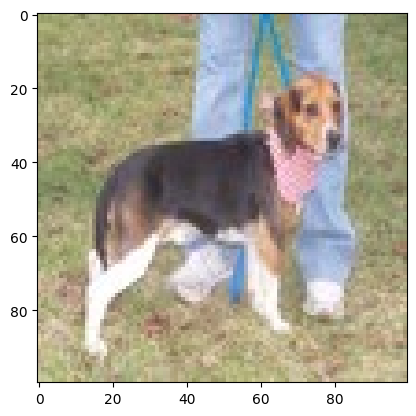

In [37]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [38]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [39]:

import keras
#opt=keras.optimizerS.SGD(learning_rate=0.001)
#model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
2/2 [==============================] - 5s 861ms/step - loss: 0.4955 - accuracy: 0.4182
Epoch 2/5
2/2 [==============================] - 2s 860ms/step - loss: 6.7780e-04 - accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 1s 450ms/step - loss: 9.3310e-06 - accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 1s 438ms/step - loss: 2.0948e-07 - accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 1s 438ms/step - loss: 1.2751e-08 - accuracy: 1.0000


In [41]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 67ms/step - loss: 8.8307e-10 - accuracy: 1.0000


[8.830698949857663e-10, 1.0]

make predictions


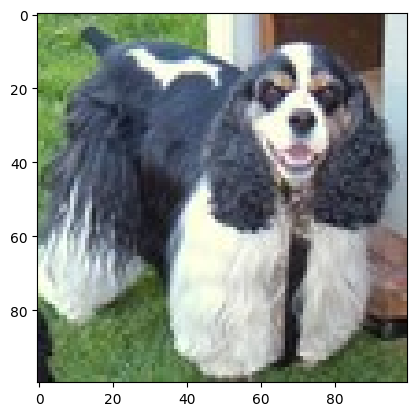

1/1 [==============================] - 0s 24ms/step
[[5.3729722e-15]]


In [58]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

In [59]:

if(y_pred>=5):
    y='CAT'
else:
  y='DOG'

print("our model is ", y)

our model is  DOG
